<a href="https://colab.research.google.com/github/Ekaterina-Meshkova/BH_HWs/blob/main/HW6_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Финальный проект
1.	Взять набор данных.
2.	Описать колонки, характеристики. Анализ EDA. Предварительная обработка данных, если это необходимо.
3.	Решить задачу сегментации или анализа временного ряда при помощи не менее 5-ти подходов ML. Составьте ансамбль моделей.
4.	Решить задачу поиска аномалий.
5.	Визуализация. Создать графики ошибок прогнозирования, метрик качества обученной модели и важности признаков.
6.	Сделать выводы по выполненной работе.


In [2]:
pip install plotly

In [197]:
# Загрузка необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering, OPTICS
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

1. Загрузка датасета

In [16]:
# Загрузка предварительно подгруженного из kaggle.com датасета
df = pd.read_csv('Student_performance_data _.csv')

2. Описание датасета. Анализ EDA. Предварительная обработка данных.

In [17]:
# Просмотр и первичный анализ датасета

# замена пустых значений на 0
df = df.fillna(0)

print('--- Первые 5 строк ---')
print(df.head())
print('--- Info ---')
print(df.info())


--- Первые 5 строк ---
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2

Набор данных содержит  информацию о 2392 учениках старших классов, подробно описывающую их демографические данные, привычки в учебе, родительскую вовлеченность, внеклассные мероприятия и успеваемость. Целевая переменная GradeClass. Этот набор данных является синтетическим и был создан в образовательных целях, содержит оригинальный набор данных, принадлежащий г-ну Раби Эль Харуа.
Набор данных дает полное представление о факторах, влияющих на успеваемость студентов:
StudentID: Уникальный идентификатор студента, задан в диапазоне от 1001 до 3392.
Age: Возраст студента, задан в диапазоне от 15 до 18 лет.
Gender: Пол студента, где 0= Мужской and 1= Женский.
Ethnicity: Этническая принадлежность студента, задана значениями:
0: Восточная Европа (Кавказ)
1: Африка\Америка
2: Азия
3: Другое
ParentalEducation: Уровень образования родителей, задан значениями:
0: Отсутствует
1: Среднее общее
2: Среднее специальное
3: Бакалавриат
4: Высшее\Магистратура
StudyTimeWeekly: Количество часов занятий в неделю, задано значениями от 0 до 20.
Absences: Количество пропусков дней за время учебы, задано значениями от 0 до 30.
Tutoring: Статус занятий с репетитором, где 0= Нет и 1= Да.
ParentalSupport: Уровень поддержки родителями, задан значениями:
0: Нет
1: Незначительный
2: Достаточный
3: Существенный
4: Доминирующий
Extracurricular: Участие во внеклассных мероприятиях, где 0=Нет и 1=Да.
Sports: Участие в спортивных состязаниях, где 0=Нет и 1=Да.
Music: Участие в музыкальных мероприятиях, где 0=Нет и 1=Да.
Volunteering: Участие в волонтерстве, где 0=Нет и 1=Да.
GPA: Grade Point Average, средний балл по шкале от 2,0 до 4,0, на который влияют привычки в учебе, участие родителей и внеклассные мероприятия.
GradeClass: Классификация оценок учащихся на основе GPA:
0: 'A' (GPA >= 3.5)
1: 'B' (3.0 <= GPA < 3.5)
2: 'C' (2.5 <= GPA < 3.0)
3: 'D' (2.0 <= GPA < 2.5)
4: 'F' (GPA < 2.0)

In [18]:
# Статистический обзор
print(df.describe())

         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min

In [19]:
# Проверка пропусков
print(df.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


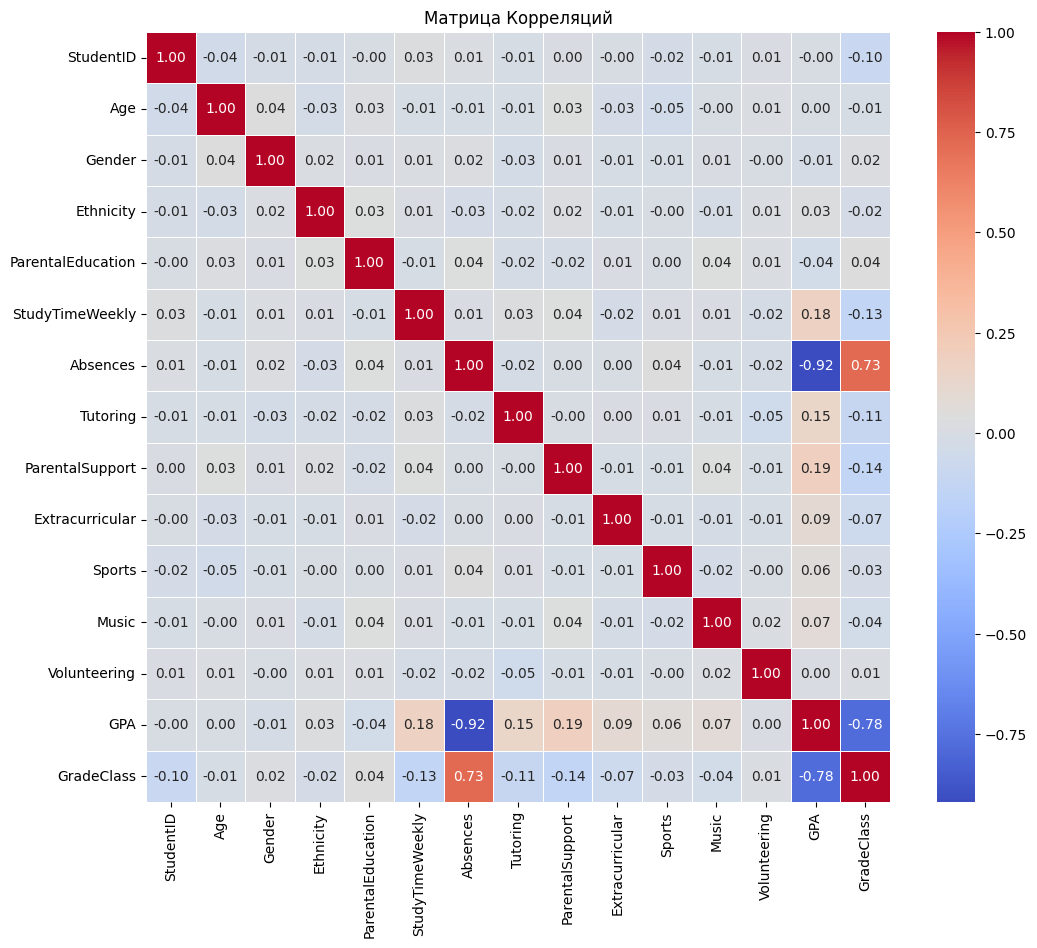

In [29]:
# Формирование матрицы корреляций
correlation_matrix = df.corr()

# Визуализация матрицы корреляций с помощью Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица Корреляций')
plt.show()

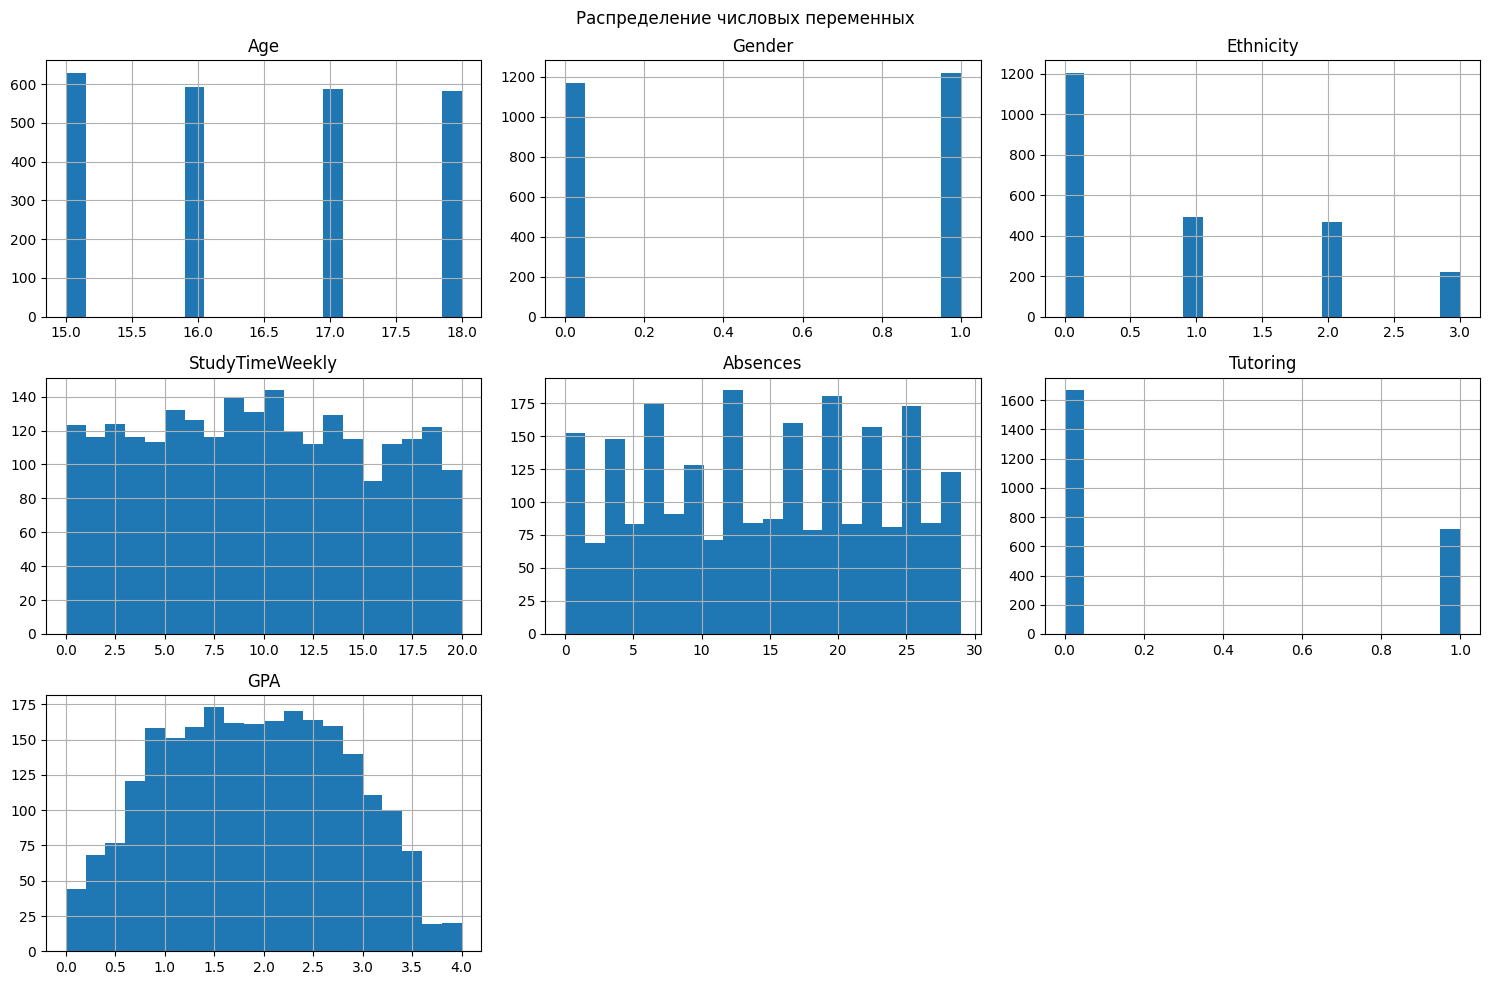

In [22]:
# Визуализация распределения числовых переменных
num_cols = ['Age', 'Gender', 'Ethnicity', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'GPA']
df[num_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle('Распределение числовых переменных')
plt.tight_layout()
plt.show()

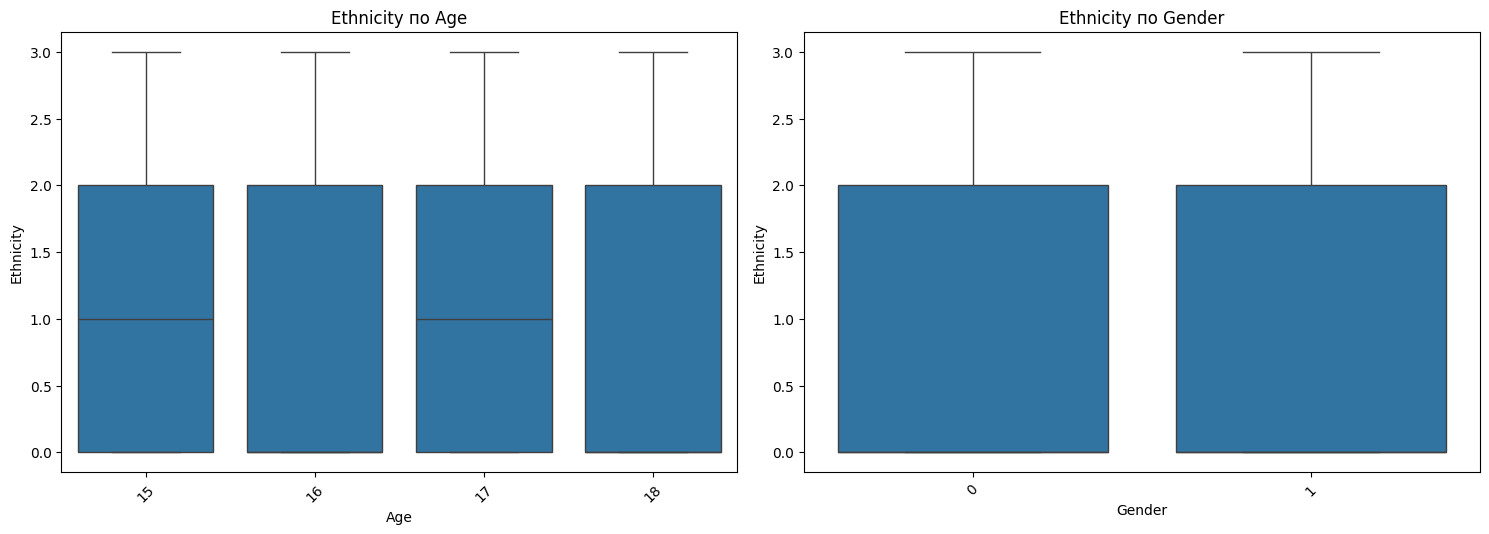

In [26]:
# Анализ Ethnicity по разным категориям
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'Gender',], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='Ethnicity', data=df)
    plt.title(f'Ethnicity по {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
# Определение итогового количества признаков для кластеризации
print(f"Итоговое количество признаков: {df.shape[1]}")

Итоговое количество признаков: 15


In [41]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 5.5 MB/s eta 0:00:00


In [143]:
# Выбор числовых признаков для кластеризации
numeric_cols = ['Age', 'Gender', 'Ethnicity', 'Absences']
X = df[numeric_cols]

In [144]:
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. Сегментация данных (несколькими методами)

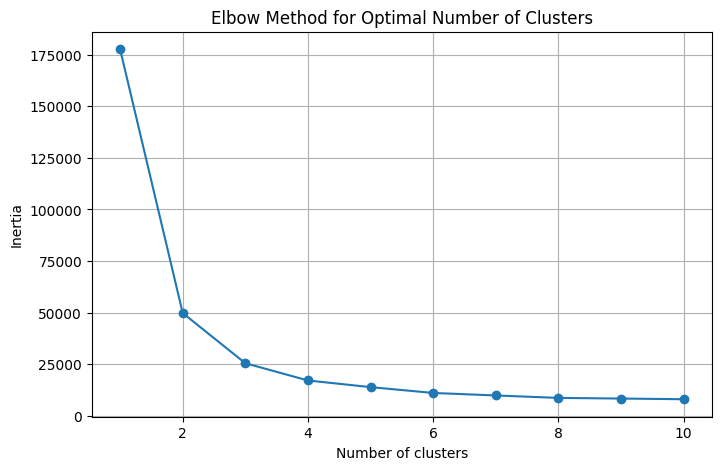

In [145]:
# Выбор оптимального количества кластеров методом локтя (Elbow Method) для выбора оптимального количества кластеров

inertia_scores = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)

# Визуализация графика с изгибом
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Количества кластеров (k) на основе метода локтя
k = 4

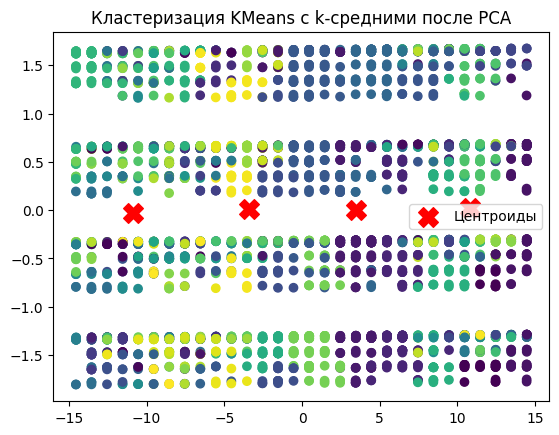

AffinityPropagation Scores:
Silhouette Score: 0.05750168597518912
Davies-Bouldin Index: 4.0295768392301685
Calinski-Harabasz Score: 244.11992903287356


In [182]:
# 3.1 Кластеризация KMeans (с использованием k-средних)

# Создание модели
kmeans = KMeans(n_clusters=k, random_state=42)

# Обучение модели
kmeans_labels = kmeans.fit_predict(X)

# Снижение размерности с использованием PCA для визуализации (не влияет)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Преобразование центров кластеров с использованием PCA (не влияет)
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Визуализация кластеров после снижения размерности
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', label='Центроиды', marker='X')
plt.title('Кластеризация KMeans с k-средними после PCA')
plt.legend()
plt.show()

# Вычисление метрик качества
print("AffinityPropagation Scores:")
print("Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans_labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, kmeans_labels))

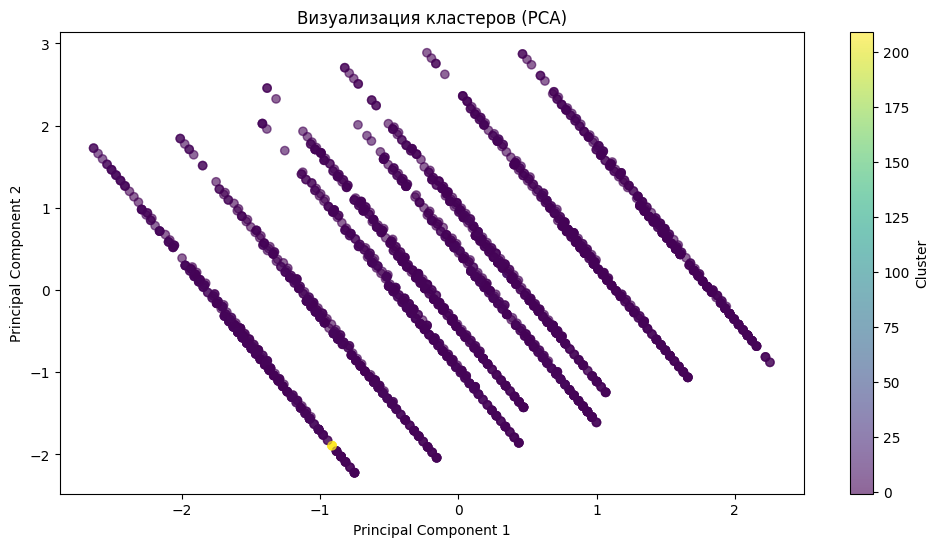

In [194]:
# PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ensemble_labels, cmap='viridis', alpha=0.6)
plt.title('Визуализация кластеров (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [180]:
# 3.2 Метод Affinity Propagation (распространения близости).

# Создание модели
af = AffinityPropagation(random_state=0) # preference

# Обучение модели
af_labels = af.fit_predict(X_scaled)

# Получение кластеров и их центров
cluster_centers_indices = af.cluster_centers_indices_

# Вывод результатов
n_clusters_ = len(cluster_centers_indices)
print(f"Количество кластеров: {n_clusters_}")

Количество кластеров: 442


In [181]:
# Вычисление метрик качества
print("AffinityPropagation Scores:")
print("Silhouette Score:", silhouette_score(X_scaled, af_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, af_labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, af_labels))

AffinityPropagation Scores:
Silhouette Score: 0.33297884129421085
Davies-Bouldin Index: 73273.75821612382
Calinski-Harabasz Score: 164.50172513149278


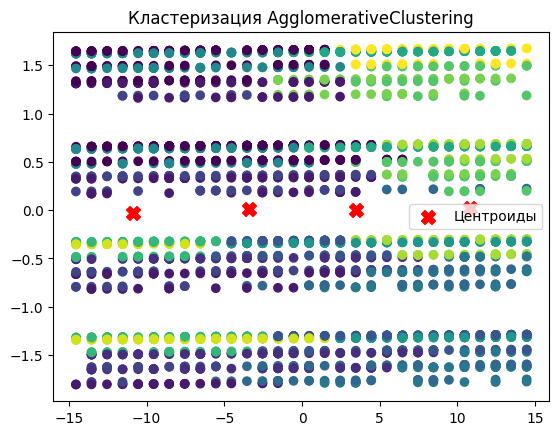

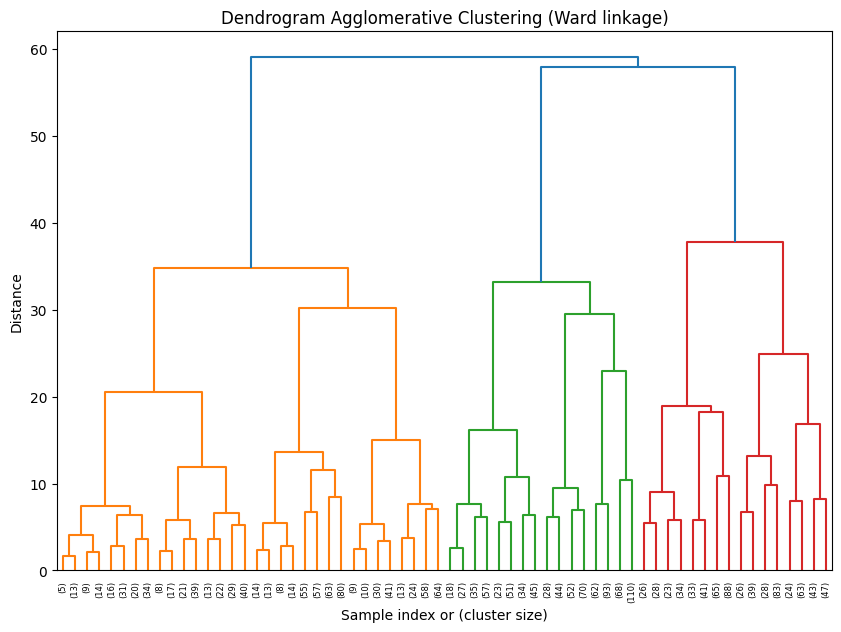

Agglomerative Clustering Scores:
Silhouette Score: 0.28812318232856987
Davies-Bouldin Index: 1.0765285436348688
Calinski-Harabasz Score: 649.1815741066106


In [174]:
# 3.3 Agglomerative Clustering

# Создание модели
agg = AgglomerativeClustering(n_clusters=16)

# Обучение модели
agg_labels = agg.fit_predict(X_scaled)

# Визуализация кластеров с использованием первых двух признаков
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, c='red', label='Центроиды', marker='X')
plt.title('Кластеризация AgglomerativeClustering')
plt.legend()
plt.show()

from scipy.cluster.hierarchy import dendrogram, linkage

# Визуализация дендрограммы
plt.figure(figsize=(10, 7))
Z = linkage(X_scaled, method='ward') # метод Уорда
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram Agglomerative Clustering (Ward linkage)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

# Вычисление метрик качества
print("Agglomerative Clustering Scores:")
print("Silhouette Score:", silhouette_score(X_scaled, agg_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, agg_labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, agg_labels))

In [175]:
# 3.4 Gaussian Mixture

# Создание модели
gmm = GaussianMixture(n_components=4, random_state=42)

# Обучение модели
gmm_labels = gmm.fit_predict(X_scaled)

# Вычисление метрик качества
print("Gaussian Mixture Scores:")
print("Silhouette Score:", silhouette_score(X_scaled, gmm_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, gmm_labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, gmm_labels))

Gaussian Mixture Scores:
Silhouette Score: 0.21104890357298106
Davies-Bouldin Index: 1.4251485979251148
Calinski-Harabasz Score: 447.91407396866737


In [176]:
# 3.5 Кластеризация с использованием OPTICS

# Создание модели
optics = OPTICS(min_samples=2)

# Обучение модели
opt_labels = optics.fit_predict(X)

# Вычисление метрик качества
print("OPTICS Scores:")
print("Silhouette Score:", silhouette_score(X_scaled, opt_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, opt_labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, opt_labels))

OPTICS Scores:
Silhouette Score: 0.8257831528988816
Davies-Bouldin Index: 0.9222486731006705
Calinski-Harabasz Score: 34.98278451792496


In [184]:
# 3.6 Создание ансамбля

cluster_df = pd.DataFrame({
    'KMeans': kmeans_labels,
    'AffinityPropagation': af_labels,
    'Agglomerative': agg_labels,
    'GMM': gmm_labels,
    'OPTICS': opt_labels
})

ensemble_labels = cluster_df.mode(axis=1)[0].astype(int)
df['Cluster'] = ensemble_labels

# Вычисление метрик ансамбля
print("Ensemble Scores:")
print("Silhouette Score:", silhouette_score(X_scaled, ensemble_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, ensemble_labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, ensemble_labels))

Ensemble Scores:
Silhouette Score: -0.16981336706420624
Davies-Bouldin Index: 2.3898088822070456
Calinski-Harabasz Score: 94.59457733899404


4. Поиск аномалий

In [185]:
# методом Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_pred = iso_forest.fit_predict(X_scaled)
df['Isolation_Forest_Anomaly'] = np.where(iso_pred == -1, 1, 0)

In [186]:
# методом KNN Anomaly Detection
knn_ad = KNN(contamination=0.05)
knn_ad.fit(X_scaled)
knn_pred = knn_ad.predict(X_scaled)
df['KNN_Anomaly'] = knn_pred

In [187]:
# методом Local Outlier Factor
lof = LOF(contamination=0.05)
lof.fit(X_scaled)
lof_pred = lof.predict(X_scaled)
df['LOF_Anomaly'] = lof_pred

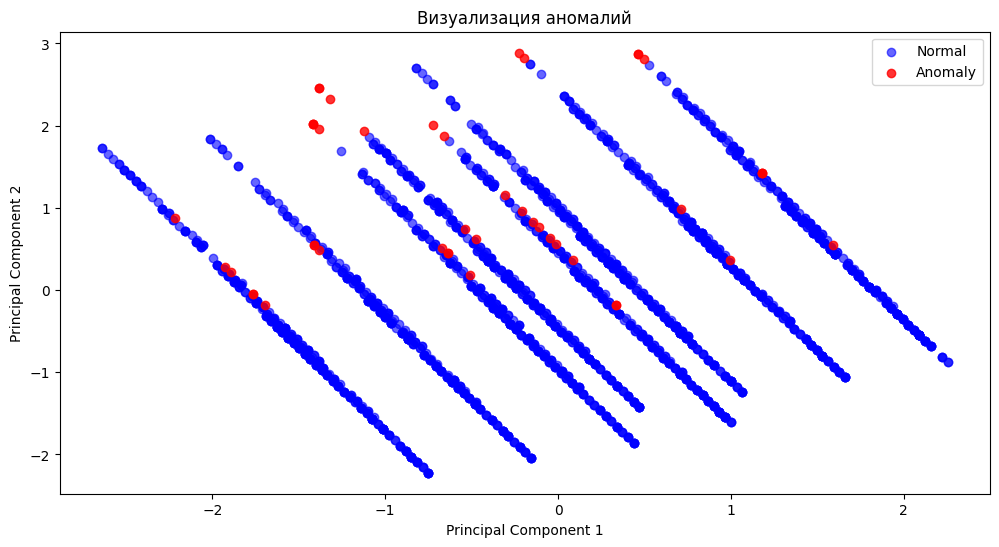

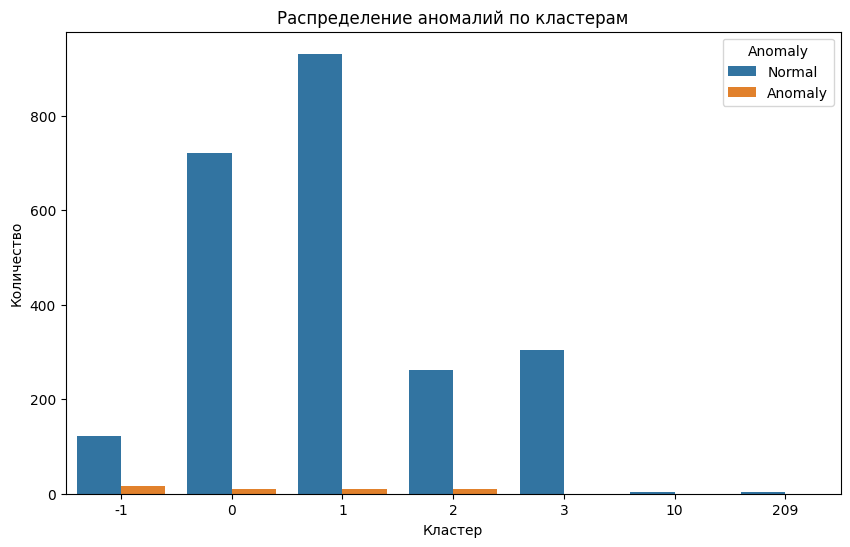

In [196]:
# Комбинирование найденных аномалий всеми методами

df['Combined_Anomaly'] = ((df['Isolation_Forest_Anomaly'] +
                            df['KNN_Anomaly'] +
                            df['LOF_Anomaly']) >= 2).astype(int)

# Визуализация аномалий
plt.figure(figsize=(12, 6))
normal = X_pca[df['Combined_Anomaly'] == 0]
anomalies = X_pca[df['Combined_Anomaly'] == 1]

plt.scatter(normal[:, 0], normal[:, 1], c='blue', alpha=0.6, label='Normal')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', alpha=0.8, label='Anomaly')
plt.title('Визуализация аномалий')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#  Визуализация распределения аномалий по кластерам
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Combined_Anomaly', data=df)
plt.title('Распределение аномалий по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Количество')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()


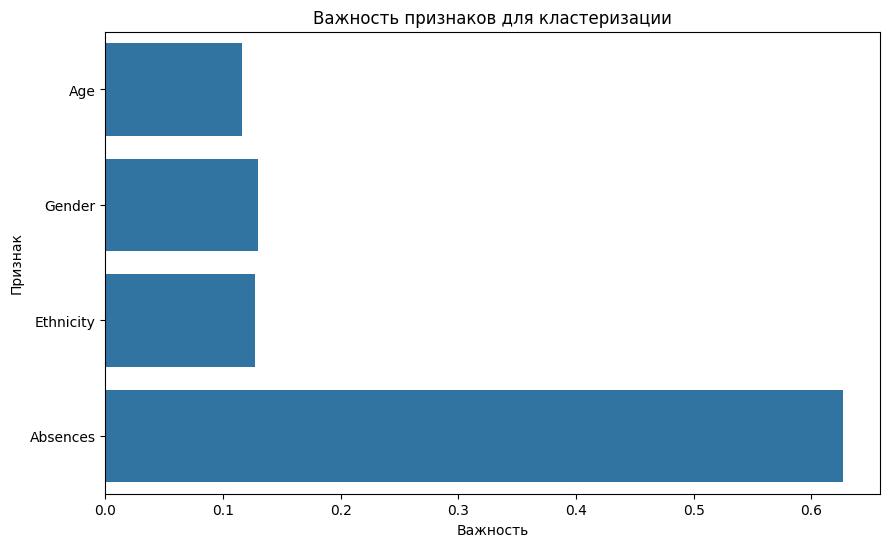

In [192]:
# 5. Для оценки важности признаков используем RandomForest для предсказания кластера

X_train, X_test, y_train, y_test = train_test_split(X_scaled, ensemble_labels, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Определение важности признаков
importances = rf.feature_importances_
features = numeric_cols

# Визуализация важности признаков

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Важность признаков для кластеризации')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

Для проекта был выбран (не совсем удачно) датасет "Student_performance_data" - синтетический датасет, созданный и подготовленный целенаправленно для обучения задачам классификации\кластеризации.

EDA анализ показал что дополнительная доработка данных не требуется, за исключением масштабирования для ускорения процессов обработки.
Методом Elbow Method был определен наиболее вероятное количество кластеров в датасете, k=4.  

Для сегментации данных были применены 5 распространенных методов кластеризации:
"KMeans", "AffinityPropagation", "Agglomerative",'GMM' и "OPTICS", и создан ансамбль на основе модального значения меток кластеров.
Оценка качества кластеризации каждым методом была произведена с применением
внутренних метрик: "Silhouette Score", "Davies-Bouldin Index" и "Calinski-Harabasz Score".  На основании рассчитанных метрик, лучшие результаты для выбранного датасета и признаков показал метод "OPTICS".

Для поиска аномалий были использованы 3 метода: " Шsolation Forest", "KNN" и "LOF".
Аномалии распределены неравномерно по кластерам расположены в основном на границах кластеров и небольшая часть - внутри кластеров.

Из выбранных для кластеризации признаков: "Age", "Gender", "Ethnicity" и "Absenses"  наиболее важным оказался параметр "Absenses".